In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head(10)
# pclass = ticket class - first etc. 
# sibsp = no. of siblings/spouses aboard
# parch = no. of parents/children aboard
# embarked = port of embarkation, C = cherbourg, Q = Queenstown and S = Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
# Seeing which columns have missing values
missing_values_count = df.isnull().sum()
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1    136
3    119
2     87
Name: Pclass, dtype: int64
3    372
2     97
1     80
Name: Pclass, dtype: int64
female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64
S    217
C     93
Q     30
Name: Embarked, dtype: int64
S    427
C     75
Q     47
Name: Embarked, dtype: int64


Text(0.5, 1.0, 'Survival rates from location of embarkation')

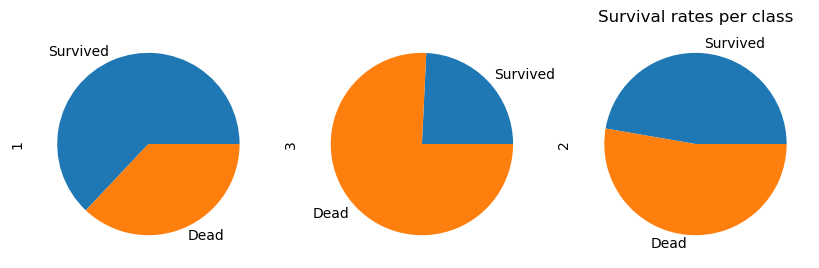

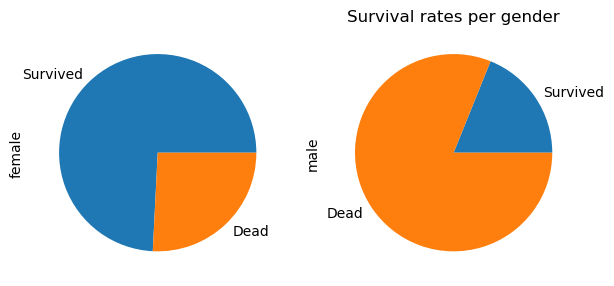

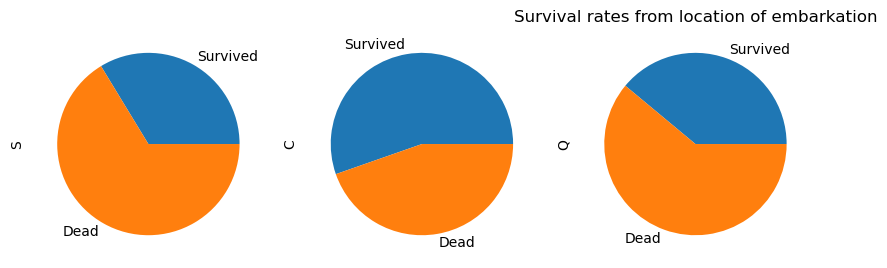

In [39]:
# What is the most important factor in determining survival of the incident
# To answer this question we don't need multiple columns; let's drop those
temp_df = df
dropped_df = temp_df.drop(columns=['Cabin', 'Name', 'Ticket'])
dropped_df.head()

# Let's look at the proportion that survived from each class
survived = dropped_df[dropped_df['Survived']==1]['Pclass'].value_counts()
dead = dropped_df[dropped_df['Survived']==0]['Pclass'].value_counts()
print(survived)
print(dead)
new_df = pd.DataFrame([survived,dead])
new_df.index = ['Survived','Dead']
new_df.plot(kind='pie', subplots=True, legend=False, figsize=(10,10))
plt.title('Survival rates per class', loc='center')

# Let's look at the proportion that survived from each gender
survived = dropped_df[dropped_df['Survived']==1]['Sex'].value_counts()
dead = dropped_df[dropped_df['Survived']==0]['Sex'].value_counts()
print(survived)
print(dead)
new_df = pd.DataFrame([survived,dead])
new_df.index = ['Survived','Dead']
new_df.plot(kind='pie', subplots=True, legend=False, figsize=(7,7))
plt.title('Survival rates per gender', loc='center')

# Let's look at the proportion that survived from each location of embarkation
survived = dropped_df[dropped_df['Survived']==1]['Embarked'].value_counts()
dead = dropped_df[dropped_df['Survived']==0]['Embarked'].value_counts()
print(survived)
print(dead)
new_df = pd.DataFrame([survived,dead])
new_df.index = ['Survived','Dead']
new_df.plot(kind='pie', subplots=True, legend=False, figsize=(10,10))
plt.title('Survival rates from location of embarkation', loc='center')

1. Factors determining survival
Pie charts above show that most important determining factor of survival from the incident is gender. This is because the pie charts for each gender show a significant difference - women are more likely to survive than men. Coming at a close second as a determining factor of survival is class. The pie charts show the higher your class, the more likely you are to survive. Lastly, if you boarded the ship from Cherbourg you are more likely to survive than the other locations.

2. Preference on lifeboats
The data shows that upper class passengers were given preference on lifeboats as the higher your class, the more likely you are to survive. This is demonstrated by the pie charts of survival per class - passengers from first class proportionally survived the most.

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


Text(0.5, 1.0, 'Survival rates vs number of parents/children aboard')

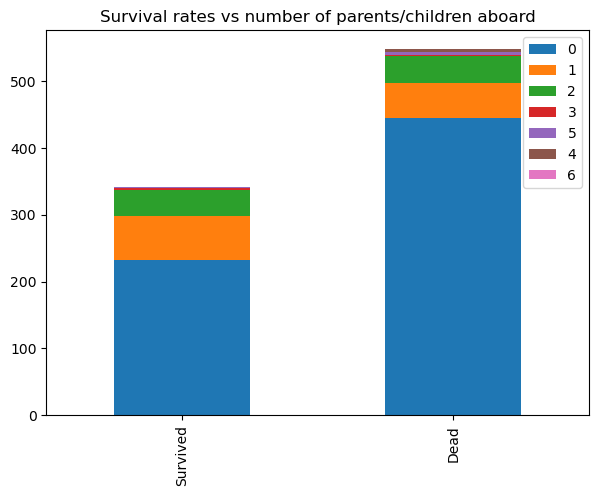

In [45]:
# 'Women and children first' - was this the case?
survived = dropped_df[dropped_df['Survived']==1]['Parch'].value_counts()
dead = dropped_df[dropped_df['Survived']==0]['Parch'].value_counts()
print(survived)
print(dead)
new_df = pd.DataFrame([survived,dead])
new_df.index = ['Survived','Dead']
new_df.plot(kind='bar', stacked=True, legend=True, figsize=(7,5))
plt.title('Survival rates vs number of parents/children aboard', loc='center')

3. Women and children first?
The stacked bar chart above shows that if you were alone (0 parents or children aboard) you were more likely to die. In addition, the pie charts per gender further above indicate that women were given priority as more survived than men. So, it can be concluded that this was more likely the case - women and children WERE first.

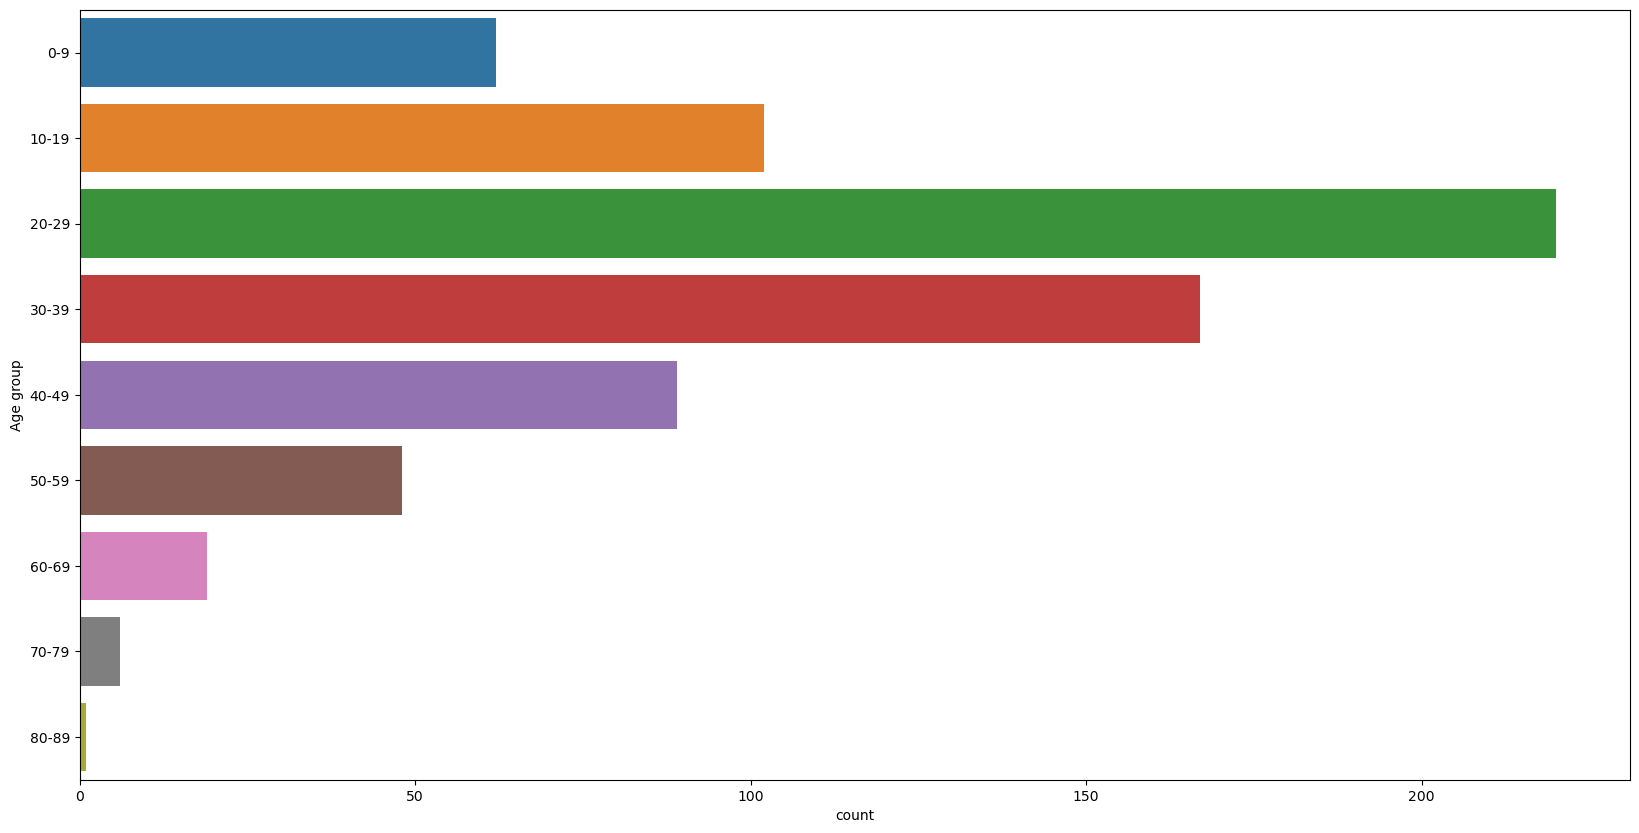

In [54]:
# Another observation
# Ages range from 0.42 - 80 - done using the min and max function
dropped_df['Age group'] = pd.cut(dropped_df['Age'], [0, 9, 19, 29, 39,49, 59,69,79,89], 
                   labels=['0-9','10-19','20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89'])
fig = plt.figure(figsize=(20,10))
sns.countplot(y=dropped_df['Age group'], data=dropped_df);

4. New observation
Most people aboard the titanic were between the ages of 20 to 39.